In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

import sys
sys.path.append('..')
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

from ipynb.fs.full.data_processing import (
    format_raw_df, 
    get_split_by_author, add_text_features_to_df, get_vectorized_series, get_feature_vector_and_label,

)

from ml_editor.model_evaluation import get_confusion_matrix_plot, get_roc_plot, get_calibration_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())


In [3]:
df = add_text_features_to_df(df.loc[df['is_question']].copy())
train_df, test_df = get_split_by_author(df, test_size = 0.2, random_state = 40)

model_path = Path('../models/model_1.pkl')
clf = joblib.load(model_path)
vectorizer_path = Path('../models/vectorizer_1.pkl')
vectorizer = joblib.load(vectorizer_path)

In [9]:
train_df['vectors'] = get_vectorized_series(train_df['full_text'].copy(), vectorizer)
test_df['vectors'] = get_vectorized_series(test_df['full_text'].copy(), vectorizer)

features = [
    'action_verb_full',
    'question_mark_full','text_len', 'language_question',
]

X_train, y_train = get_feature_vector_and_label(train_df, features)
X_test, y_test = get_feature_vector_and_label(test_df, features)
y_predicted = clf.predict(X_test)
y_predicted_proba = clf.predict_proba(X_test)

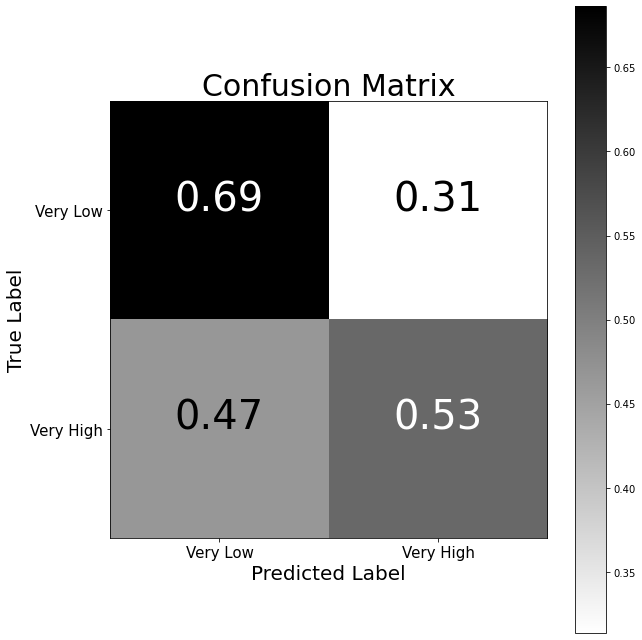

In [5]:
get_confusion_matrix_plot(y_predicted, y_test, figsize = (9,9), classes = ['Very Low', 'Very High'], normalize = True)
plt.show()

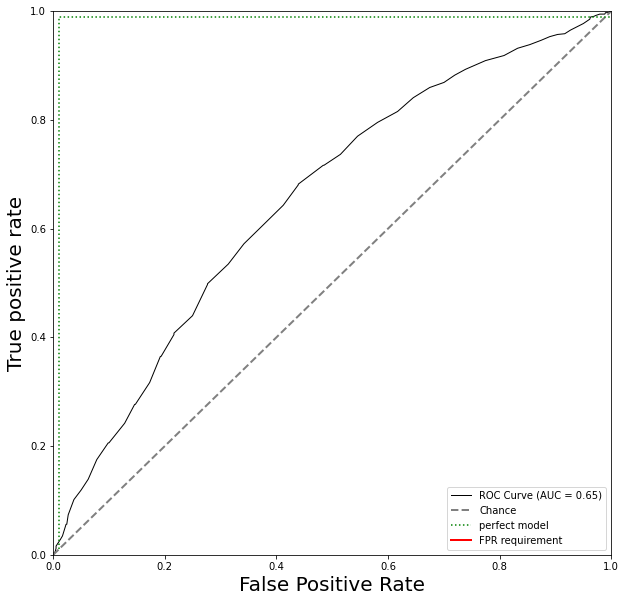

In [16]:
get_roc_plot(y_predicted_proba[:,1], y_test)
plt.show()

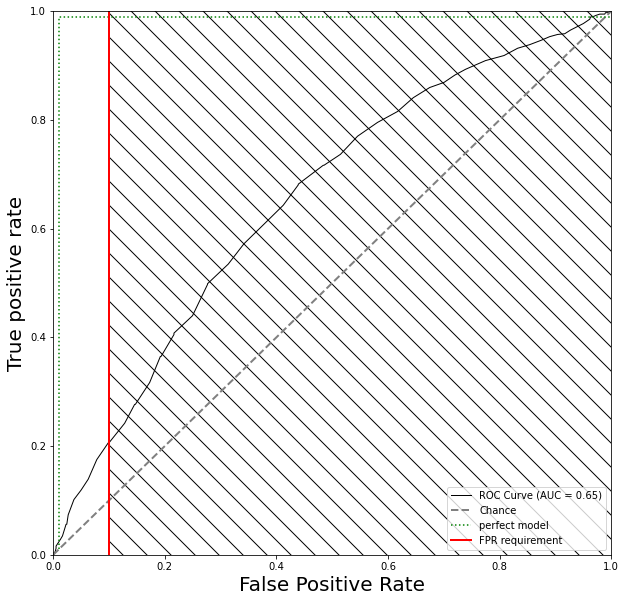

In [18]:
get_roc_plot(y_predicted_proba[:,1], y_test, fpr_bar = .1, figsize = (10,10))
plt.show()

No handles with labels found to put in legend.


	Brier: 0.234


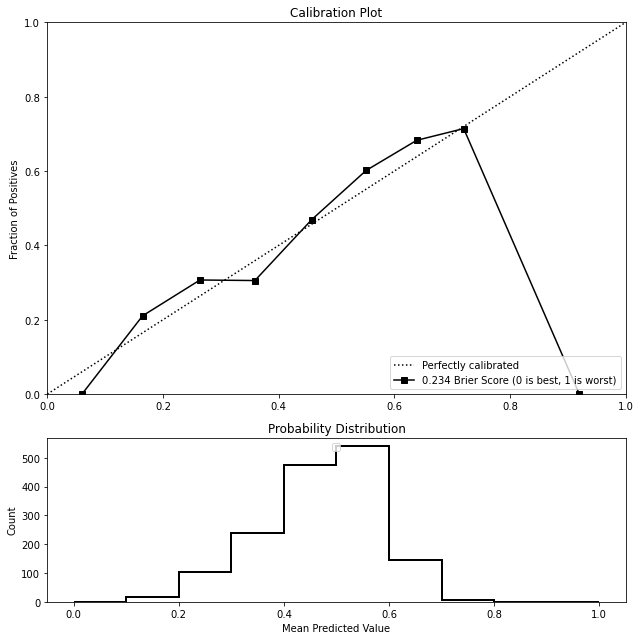

In [24]:
get_calibration_plot(y_predicted_proba[:,1], y_test, figsize = (9,9))